<a href="https://colab.research.google.com/github/lmcanavals/analytics_visualization/blob/main/notebooks/aa_data_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
!pip install wquantiles

  Created wheel for wquantiles: filename=wquantiles-0.5-cp37-none-any.whl size=2509 sha256=89e6eada2462181edc9f63d2ddc7f618f609be57b5e046d35f38033e171a7471
  Stored in directory: /root/.cache/pip/wheels/24/61/20/f9e1b00d1697d793c1b423cecbdb40fc65dd29a6188e78af41
Successfully built wquantiles


In [4]:
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import matplotlib.pylab as plt
import seaborn as sns

In [5]:
url="https://raw.githubusercontent.com/lmcanavals/analytics_visualization/main/data/state.csv"
state = pd.read_csv(url)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
state['Population'].mean()

6162876.3

In [7]:
trim_mean(state['Population'], 0.1)

4783697.125

In [8]:
state['Population'].median()

4436369.5

In [9]:
state['Murder.Rate'].mean()

4.066

In [10]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [11]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# Estimaciones de variabilidad

In [12]:
state['Population'].std()

6848235.347401142

Rango intercuartil.

In [13]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

# Percentiles

In [14]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
state['Murder.Rate'].quantile(percentages)

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [15]:
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f"{p * 100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


# Boxplot

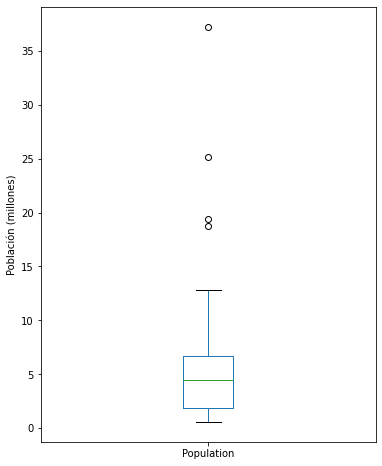

In [16]:
ax = (state['Population']/1_000_000).plot.box(figsize=(6, 8))
ax.set_ylabel('Población (millones)')
plt.show()

# Tabla de frecuencia

In [17]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [22]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
  groups.append({
      'BinRange': group,
      'Count': len(subset),
      'States': ' '.join(subset['Abbreviation'])
  })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,WY VT ND AK SD DE MT RI NH ME HI ID NE WV NM N...
1,"(4232659.0, 7901692.0]",14,KY LA SC AL CO MN WI MD MO TN AZ IN MA WA
2,"(7901692.0, 11570725.0]",6,VA NJ NC GA MI OH
3,"(11570725.0, 15239758.0]",2,PA IL
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


# Histograms

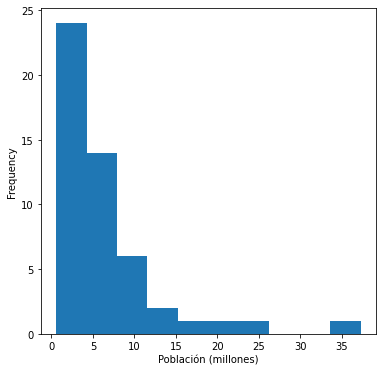

In [23]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(6, 6))
ax.set_xlabel('Población (millones)')
plt.show()

# Densidad

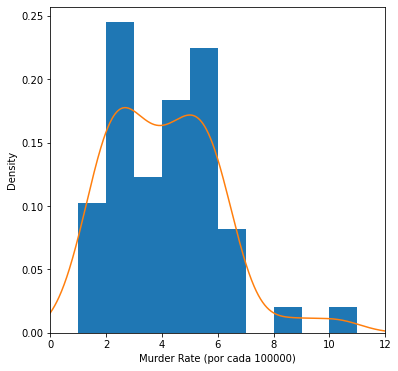

In [32]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1, 12), figsize=(6, 6))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (por cada 100000)')
plt.show()

In [28]:
list(range(1, 12))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Actividad grupal

1. Elabore una tabla de frecuencia por Murder.Rate
1. Un histograma por Murder.Rate
1. Densidad por población